In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Project Goals
### The purpose of this analysis is: 

- Create a linear regression model that predicts the outcome for a tennis player based on their playing habits. 
- Determine which features help to predict the target value of winnings in USD.




First, let's explore the dataset:

In [3]:
df = pd.read_csv('tennis_stats.csv')
display(df.head())   # Use display instead of print to show an HTML table
display(df.info())   # info() to find non-null values and data types of each column

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

None

There is not missing data.
Let's proceed with EDA:

In [4]:
# Plot a graphical correlation matrix for each pair of columns in the dataframe
corr = df.corr() # data frame correlation function
# Let's check out the correlation among features for our target outcome Winnings:
winnings = pd.DataFrame(round(corr['Winnings'], 3).drop('Winnings', axis = 0).reset_index())
# Remove the Winnings category itself and sort those features with more importance
winnings = winnings.sort_values(by = "Winnings", ascending = False)
winnings

,index,Winnings
19,Wins,0.913
15,ServiceGamesPlayed,0.913
12,ReturnGamesPlayed,0.913
9,BreakPointsOpportunities,0.900
8,BreakPointsFaced,0.876
20,Losses,0.869
11,DoubleFaults,0.855
6,Aces,0.798
17,TotalPointsWon,0.461
18,TotalServicePointsWon,0.408


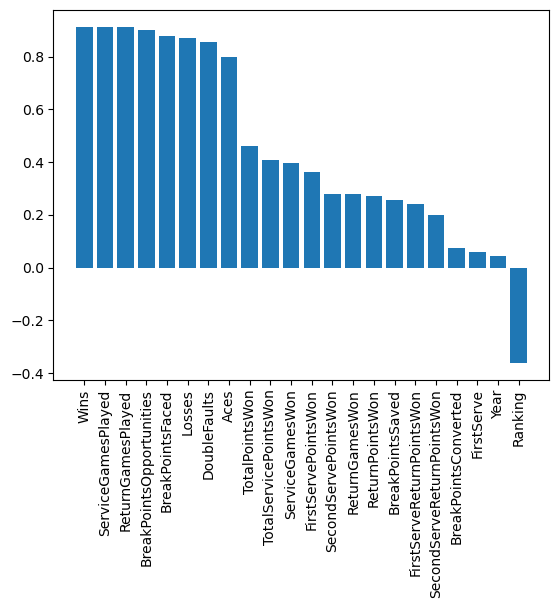

In [5]:
# Now let's plot it
plt.bar(winnings['index'], winnings.Winnings)
plt.xticks(rotation = 90)
plt.show()

we will plot the features with a strong correlation (>0.80):
- Wins	*0.91*
- ServiceGamesPlayed	0.91
- ReturnGamesPlayed	0.91
- BreakPointsOpportunities	0.90
- BreakPointsFaced	0.88
- Losses	0.87
- DoubleFaults	0.85
- Aces 0.80

In [6]:
top_features = ['Wins', 
                'ServiceGamesPlayed', 
                'ReturnGamesPlayed',
                'BreakPointsOpportunities', 
                'BreakPointsFaced', 
                'Losses', 'DoubleFaults', 'Aces']
df_top = df[top_features]
df_target = df[['Winnings']]

Scatter plot creation with the features with a correlation >= 0.80

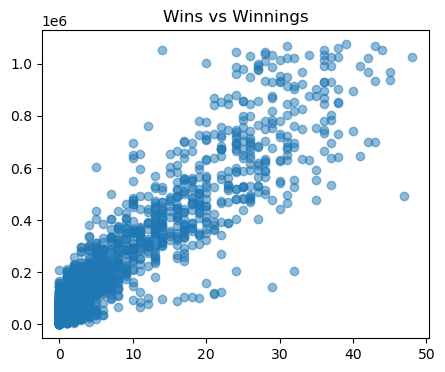

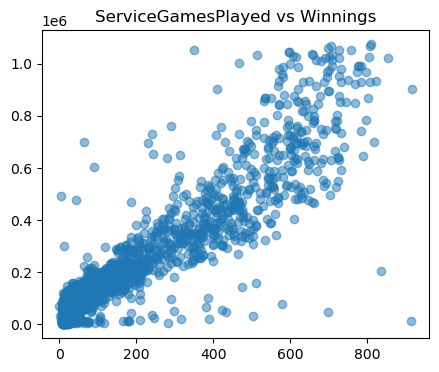

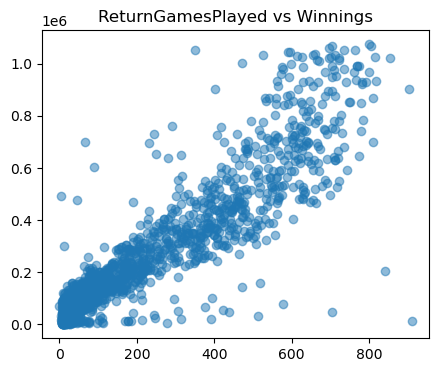

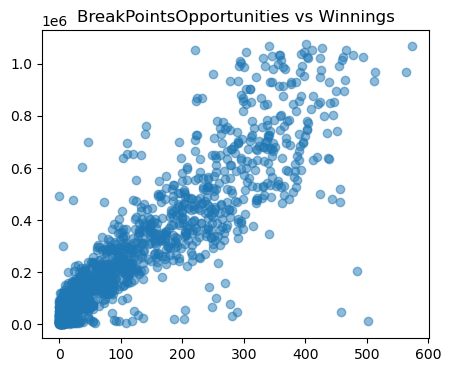

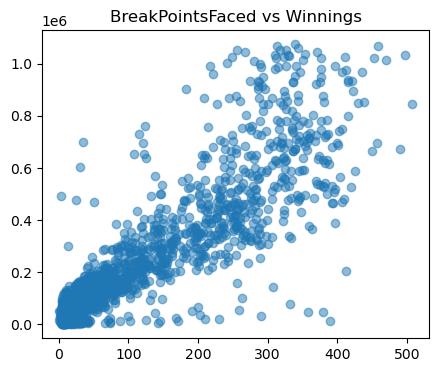

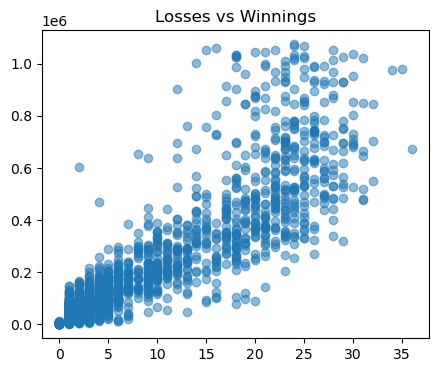

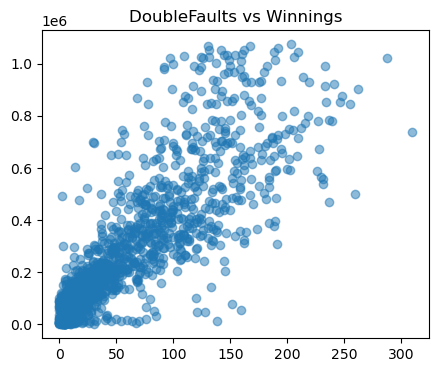

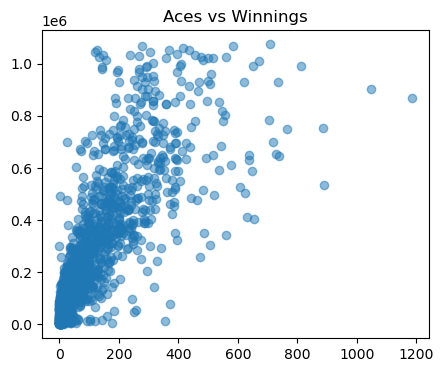

In [7]:
# perform exploratory analysis here:
for feature in df_top.columns:
    plt.figure(figsize = (5, 4))
    plt.scatter(x = df_top[feature], y = df_target, alpha = 0.5)
    plt.title(f"{feature} vs Winnings")
    plt.show()

# Regression model
Let's use one feature from the dataset to build a single feature linear regression model on the data. The model, at this point, should use only one feature and predict the Winnngs($USD) columns. Before training the model, split we will split data into training and test datasets so that you we may evaluate our model on the test set.

In [8]:
feature = 'ServiceGamesPlayed'
X = np.array(df[feature])
X = X.reshape(-1, 1)
y = df_target.copy()

# Setting the test size as 80% and creating a seed for repeatable results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8,
random_state = 27)

reg_all = LinearRegression()        #Creating the model
reg_all.fit(X_train, y_train)       #Fitting the model to our training data
y_pred = reg_all.predict(X_test)    #Predicting the y values using our test data

### How does our model perform? 

In [9]:
reg_all.score(X_test, y_test)

0.8473593043810999

Plotting our model’s predictions on the test set against the actual outcome variable to visualize the performance.

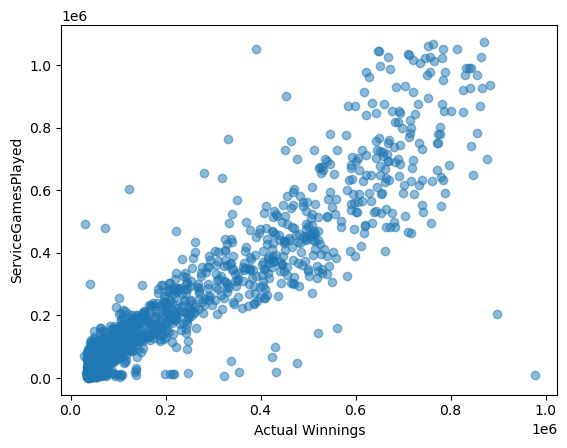

In [10]:
# plot predictions against actual winnings
plt.scatter(x = y_pred, y = y_test, alpha = 0.5)
plt.xlabel('Actual Winnings')
plt.ylabel(feature)
plt.show()

### Plotting 

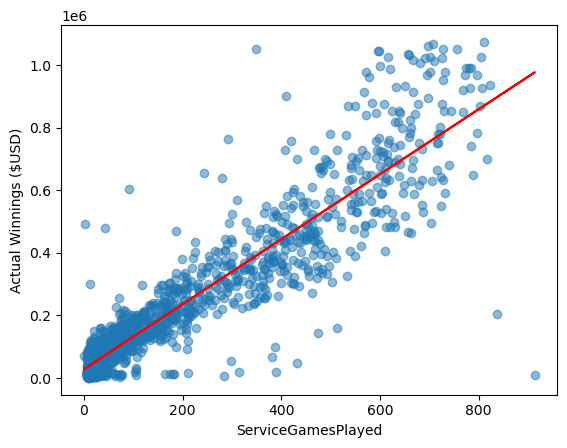

In [11]:
plt.scatter(X_test, y_test, alpha = 0.5)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel(feature)
plt.ylabel('Actual Winnings ($USD)')
plt.show()

Let's create a few more linear regression models that use one feature to predict one of the outcomes. Which model that you create is the best?

#### Feature - 'Wins'

In [12]:
feature = 'Wins'
X = np.array(df[feature])
X = X.reshape(-1, 1)
y = df_target.copy()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8,
random_state = 27)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.8275924099072007

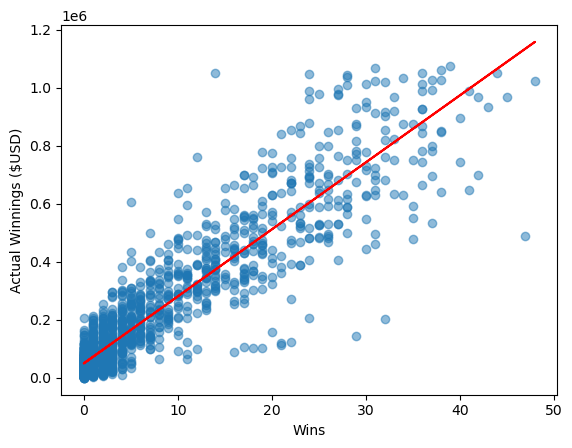

In [13]:
plt.scatter(X_test, y_test, alpha = 0.5)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel(feature)
plt.ylabel('Actual Winnings ($USD)')
plt.show()

#### Feature - 'ReturnGamesPlayed'

In [14]:
feature = 'ReturnGamesPlayed'
X = np.array(df[feature])
X = X.reshape(-1, 1)
y = df_target.copy()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8,
random_state = 27)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.8468450427563887

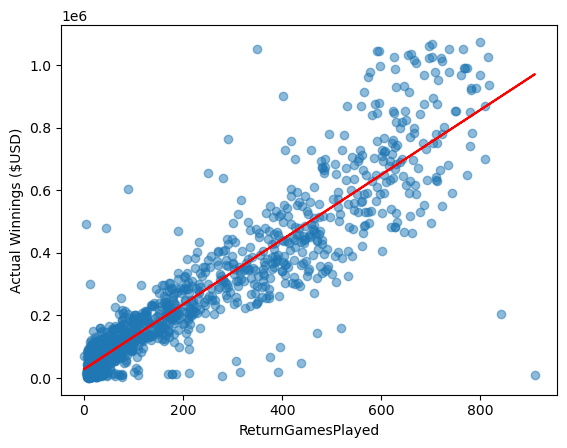

In [15]:
plt.scatter(X_test, y_test, alpha = 0.5)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel(feature)
plt.ylabel('Actual Winnings ($USD)')
plt.show()

#### Feature - 'BreakPointsOpportunities'

In [16]:
feature = 'BreakPointsOpportunities'
X = np.array(df[feature])
X = X.reshape(-1, 1)
y = df_target.copy()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8,
random_state = 27)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.8183558212276655

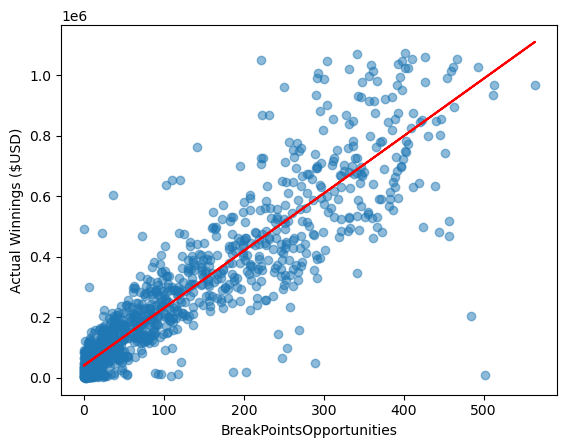

In [17]:
plt.scatter(X_test, y_test, alpha = 0.5)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel(feature)
plt.ylabel('Actual Winnings ($USD)')
plt.show()

Now, let's create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

In [18]:
feature = ['ServiceGamesPlayed', 'ReturnGamesPlayed']
X = np.array(df[feature])
#X = X.reshape(-1, 1)
y = df_target.copy()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8,
random_state = 27)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.846774796700716

In [19]:
## perform two feature linear regressions here:
feature = ['BreakPointsOpportunities', 'ReturnGamesPlayed']
X = np.array(df[feature])
#X = X.reshape(-1, 1)
y = df_target.copy()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8,
random_state = 27)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.8420134872921269

In [20]:
feature = ['ServiceGamesPlayed', 'BreakPointsOpportunities']
X = np.array(df[feature])
#X = X.reshape(-1, 1)
y = df_target.copy()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8,
random_state = 27)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.8429104837664592

### Finally, we will create a multiple feature linear regression using our eight top features:

In [21]:
## perform multiple feature linear regressions here:
feature = ['Wins', 
                'ServiceGamesPlayed', 
                'ReturnGamesPlayed',
                'BreakPointsOpportunities', 
                'BreakPointsFaced', 
                'Losses', 'DoubleFaults', 'Aces']
X = np.array(df[feature])
#X = X.reshape(-1, 1)
y = df_target.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8,
random_state = 27)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.8542101724886431

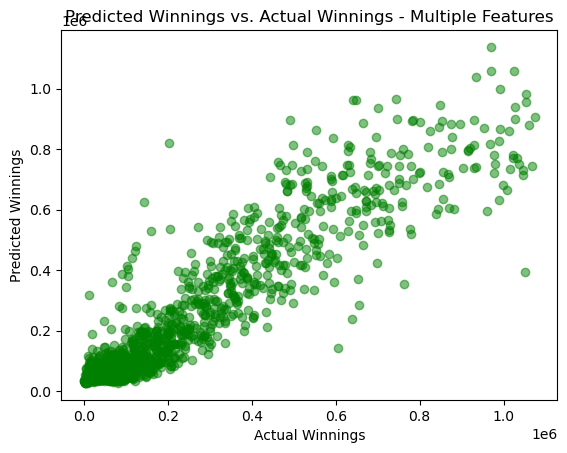

<Figure size 640x480 with 0 Axes>

In [22]:
plt.scatter(y_test, y_pred, alpha = 0.5, color = 'green')
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()